# Test 40: The $\chi^2$-test for consistency in a 2 × 2 table

## Objective

- I have a 2x2 table
- Is there a significant difference between the observed frequencies of the 2 distributions

## Assumptions

- Your sample sizes should be large enough
    - Total counts $n = a+b+c+d \ge 20$
    - $a,b,c,d \ge 3$

- The underlying assumption is that the distribution is continuous. If applied to a discrete distribution, note that you should apply continuity correction (Yate's correction)

## Method

- You have the 2x2 table below

| | Class 1A | Class 1B | Total |
| - | - | - | - |
| Class 2A | a | b | a + b |
| Class 2B | c | d | c + d |
| Total | a+c | b+d | n=a+b+c+d |

- The test statistic is 
$$\begin{aligned}
    \chi^2 &= \frac{(n-1)(ad - bc)^2}{(a+b)(a+c)(b+d)(c+d)}
\end{aligned}$$

- This test statistic follows a $\chi^2$ distribution with 1 degree of freedom

- If test statistic exceeds the critical value in the $\chi^2$ table, then we reject the null hypothesis that there is no difference between the distribution of Class 1A (e.g. smoker) and 1B (e.g. non-smokers) betweeen Class 2A (e.g. cancer) and 2B (e.g. non-cancer)

## Proof

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def get_test_statistic():
    a,b,c,d = np.random.normal(10,3,4).astype(int)
    n = a+b+c+d
    test_statistic = (
        ((n-1) * (a*d - b*c)**2) /
        ((a+b)*(a+c)*(b+d)*(c+d))
    )
    return test_statistic

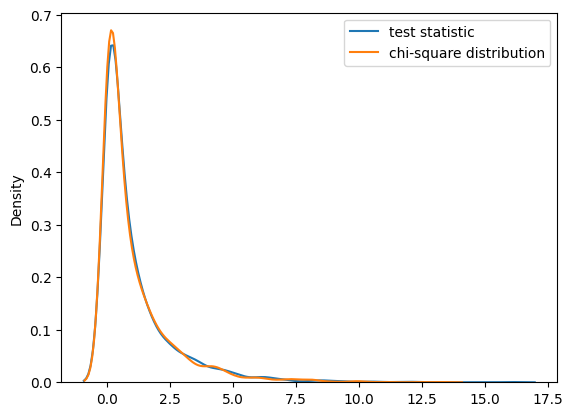

In [6]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chi-square distribution')
plt.legend()
